## Importació de llibreries i funcions pròpies

In [1]:
import pandas as pd
import pandoc
from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, mitjana_i_std_num, comptatge_i_percentatge_cat 
from listas import cat_var_ger, num_var_ger

## Càrrega i segmentació de les dades

In [2]:
taula = pd.read_pickle('./data/processed/dataframe.pkl')

AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECV-V positiu"] < 30)]
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECV-V positiu"] > 30) &
           (taula['P diagnosticada'] == 1.0)]
TOTAL = taula

# Anàlisi descriptiva de les dades

### Comptatges i percentatges de variables categòriques per grup

In [3]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_var_ger)

+------------------------+--------------+-------+------------+--------------+
|        Columna         |  DataFrame   | Valor | Comptatges | Percentatges |
+------------------------+--------------+-------+------------+--------------+
|    Caigudes prèvies    |    AMB_PA    |   0   |    2979    |    94.42%    |
|                        |              |       |            |              |
|    Caigudes prèvies    |    AMB_PA    |   1   |    176     |    5.58%     |
|                        |              |       |            |              |
|    Caigudes prèvies    | AMB_PA_MECVV |   0   |    227     |    89.37%    |
|                        |              |       |            |              |
|    Caigudes prèvies    | AMB_PA_MECVV |   1   |     27     |    10.63%    |
|                        |              |       |            |              |
|    Caigudes prèvies    |   SENSE_PA   |   0   |    975     |    85.38%    |
|                        |              |       |            |  

### Mitjanes i desviacions estàndard de variables numèriques per grup

In [4]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

mitjana_i_std_num(llista_dfs, num_var_ger)

+----------+--------------+---------+---------------------+
| Columna  |  DataFrame   | Mitjana | Desviació Estàndard |
+----------+--------------+---------+---------------------+
| Charlson |    AMB_PA    |   7.28  |        13.99        |
|          |              |         |                     |
| Charlson | AMB_PA_MECVV |  15.89  |        17.87        |
|          |              |         |                     |
| Charlson |   SENSE_PA   |  23.79  |        24.56        |
|          |              |         |                     |
| Charlson |    TOTAL     |   6.22  |        14.11        |
|          |              |         |                     |
|          |              |         |                     |
+----------+--------------+---------+---------------------+


C:\Users\jmiro\GitHub\PRACTICUM\auxiliary_functions.py:1190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col],


# Síndromes geriàtriques

## Index de Charlson

#### Comparació distributiva. Test d'independència

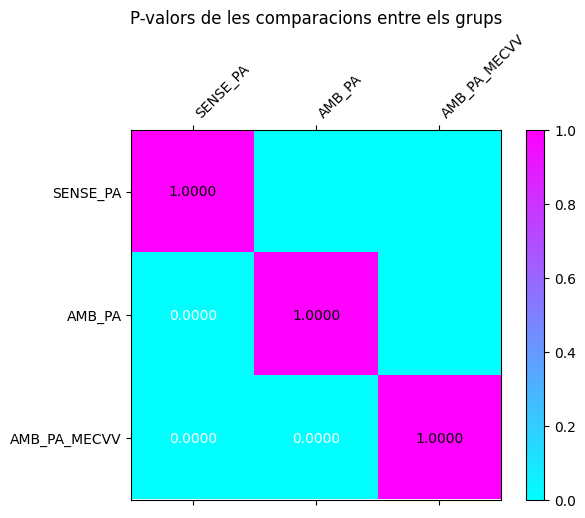

In [5]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Charlson'])

## Caigudes prèvies

#### Comparació distributiva. Test d'independència

In [6]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Caigudes prèvies'])

Chi-squared: 68.9774
P-value: 0.0000
---


(1.0513492472065528e-15,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    38.826403  4.632197e-10
 1    SENSE_PA  AMB_PA_MECVV    33.432239  7.379058e-09
 2      AMB_PA  AMB_PA_MECVV     9.323809  2.261953e-03)

## Deliris

#### Comparació distributiva. Test d'independència

In [7]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Deliris'])

Chi-squared: 295.5502
P-value: 0.0000
---


(6.638730218466583e-65,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA   260.067641  1.658716e-58
 1    SENSE_PA  AMB_PA_MECVV    51.662900  6.589624e-13
 2      AMB_PA  AMB_PA_MECVV     2.985858  8.399474e-02)

## Demència

#### Comparació distributiva. Test d'independència

In [8]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Demència'])

Chi-squared: 487.7734
P-value: 0.0000
---


(1.2060309726061119e-106,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA   435.508117  1.028169e-96
 1    SENSE_PA  AMB_PA_MECVV    75.526301  3.605719e-18
 2      AMB_PA  AMB_PA_MECVV     4.303369  3.803696e-02)

## Síndrome depressiva

#### Comparació distributiva. Test d'independència

In [9]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Síndrome depressiva'])

Chi-squared: 46.2742
P-value: 0.0000
---


(8.947115888594285e-11,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    14.482073  1.414998e-04
 1    SENSE_PA  AMB_PA_MECVV    32.811264  1.015547e-08
 2      AMB_PA  AMB_PA_MECVV    17.378681  3.062417e-05)

## Incontinència urinària

#### Comparació distributiva. Test d'independència

In [10]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Incont.uri'])

Chi-squared: 530.1519
P-value: 0.0000
---


(7.568107172195669e-116,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA   447.171288  2.976637e-99
 1    SENSE_PA  AMB_PA_MECVV   115.691018  5.554292e-27
 2      AMB_PA  AMB_PA_MECVV    12.052452  5.172429e-04)

## Incontinència fecal 

#### Comparació distributiva. Test d'independència

In [11]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Incont.fec'])

Chi-squared: 709.0258
P-value: 0.0000
---


(1.0889606528994771e-154,
   Categoria 1   Categoria 2  Chi-squared        P-value
 0    SENSE_PA        AMB_PA   694.128363  5.656371e-153
 1    SENSE_PA  AMB_PA_MECVV    46.747729   8.073843e-12
 2      AMB_PA  AMB_PA_MECVV     0.312721   5.760155e-01)

## Úlceres de pressió

#### Comparació distributiva. Test d'independència

In [12]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Úlceres pressió'])

Chi-squared: 164.8916
P-value: 0.0000
---


(1.564028542913566e-36,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA   160.608190  8.332353e-37
 1    SENSE_PA  AMB_PA_MECVV     6.507594  1.074148e-02
 2      AMB_PA  AMB_PA_MECVV     0.108064  7.423594e-01)

## Immobilitat

#### Comparació distributiva. Test d'independència

In [13]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Immobilitat'])

Chi-squared: 774.1220
P-value: 0.0000
---


(7.971659965337803e-169,
   Categoria 1   Categoria 2  Chi-squared        P-value
 0    SENSE_PA        AMB_PA   657.469655  5.304232e-145
 1    SENSE_PA  AMB_PA_MECVV   185.749163   2.693091e-42
 2      AMB_PA  AMB_PA_MECVV    14.324842   1.538215e-04)

## Confusió

#### Comparació distributiva. Test d'independència

In [14]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Confusió'])

Chi-squared: 295.5502
P-value: 0.0000
---


(6.638730218466583e-65,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA   260.067641  1.658716e-58
 1    SENSE_PA  AMB_PA_MECVV    51.662900  6.589624e-13
 2      AMB_PA  AMB_PA_MECVV     2.985858  8.399474e-02)

## Osteoporosi

#### Comparació distributiva. Test d'independència

In [15]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Osteoporosi'])

Chi-squared: 81.4704
P-value: 0.0000
---


(2.0366589558931237e-18,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    59.097332  1.500626e-14
 1    SENSE_PA  AMB_PA_MECVV    25.752065  3.882114e-07
 2      AMB_PA  AMB_PA_MECVV     5.275118  2.163233e-02)

## Sarcopènia

#### Comparació distributiva. Test d'independència

In [16]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Sarcopènia'])

Chi-squared: 47.5066
P-value: 0.0000
---


(4.831380429479334e-11,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    45.600412  1.450111e-11
 1    SENSE_PA  AMB_PA_MECVV     0.000000  1.000000e+00
 2      AMB_PA  AMB_PA_MECVV     1.491757  2.219441e-01)

## Trastorns del son

#### Comparació distributiva. Test d'independència

In [17]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Probl.son'])

Chi-squared: 35.2660
P-value: 0.0000
---


(2.1982902775033917e-08,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    15.823153  6.954629e-05
 1    SENSE_PA  AMB_PA_MECVV    15.921750  6.601570e-05
 2      AMB_PA  AMB_PA_MECVV    30.357378  3.593375e-08)

## Dolor crònic

#### Comparació distributiva. Test d'independència

In [18]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Dolor crònic'])

Chi-squared: 2.7087
P-value: 0.2581
---


0.2581180382440347

## Iatrogènia

#### Comparació distributiva. Test d'independència

In [19]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Iatrogènia'])

Chi-squared: 5.8269
P-value: 0.0543
---


0.054288249615978196

## Restrenyiment

#### Comparació distributiva. Test d'independència

In [20]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Restrenyiment'])

Chi-squared: 205.1246
P-value: 0.0000
---


(2.869232180662262e-45,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA   140.427728  2.146251e-32
 1    SENSE_PA  AMB_PA_MECVV    83.346209  6.887074e-20
 2      AMB_PA  AMB_PA_MECVV    14.481979  1.415068e-04)

# Historial mèdic/comorbiditats

## Malalties cerebrovasculars

#### Comparació distributiva. Test d'independència

In [21]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['CV'])

Chi-squared: 114.3824
P-value: 0.0000
---


(1.4527282004533052e-25,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    56.564230  5.439234e-14
 1    SENSE_PA  AMB_PA_MECVV    66.301302  3.870030e-16
 2      AMB_PA  AMB_PA_MECVV    19.027791  1.288284e-05)

## Malalties cardíaques

#### Comparació distributiva. Test d'independència

In [22]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Probl.cor'])

Chi-squared: 66.8277
P-value: 0.0000
---


(3.080043249817629e-15,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA     0.669959  4.130659e-01
 1    SENSE_PA  AMB_PA_MECVV    64.755613  8.478776e-16
 2      AMB_PA  AMB_PA_MECVV    52.090790  5.299289e-13)

## Malalties neurodegeneratives

#### Comparació distributiva. Test d'independència

In [23]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Neurodegeneratives'])

Chi-squared: 89.3452
P-value: 0.0000
---


(3.97137091455024e-20,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    61.308138  4.880588e-15
 1    SENSE_PA  AMB_PA_MECVV    33.225140  8.208245e-09
 2      AMB_PA  AMB_PA_MECVV     5.961644  1.462040e-02)

## Diabetis mellitus

#### Comparació distributiva. Test d'independència

In [24]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['DM'])

Chi-squared: 56.4361
P-value: 0.0000
---


(5.559677689475769e-13,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    10.797550  1.016345e-03
 1    SENSE_PA  AMB_PA_MECVV    46.598776  8.711466e-12
 2      AMB_PA  AMB_PA_MECVV    29.148339  6.704320e-08)

## Hepatopaties

#### Comparació distributiva. Test d'independència

In [25]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Hepatopaties'])

Chi-squared: 10.6659
P-value: 0.0048
---


(0.0048298214097055635,
   Categoria 1   Categoria 2  Chi-squared   P-value
 0    SENSE_PA        AMB_PA     7.133418  0.007566
 1    SENSE_PA  AMB_PA_MECVV     2.303298  0.129100
 2      AMB_PA  AMB_PA_MECVV     5.676852  0.017190)

## Neoplàsies

#### Comparació distributiva. Test d'independència

In [26]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Neoplàsies'])

Chi-squared: 24.1764
P-value: 0.0000
---


(5.6255099137405326e-06,
   Categoria 1   Categoria 2  Chi-squared   P-value
 0    SENSE_PA        AMB_PA    12.416317  0.000426
 1    SENSE_PA  AMB_PA_MECVV     9.443246  0.002119
 2      AMB_PA  AMB_PA_MECVV    18.201155  0.000020)

## Malaltia renal crònica (creatinina > 1.5mg/dL)

#### Comparació distributiva. Test d'independència

In [27]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Malaltia renal crònica'])

Chi-squared: 64.6072
P-value: 0.0000
---


(9.34808880662324e-15,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA     1.657404  1.979542e-01
 1    SENSE_PA  AMB_PA_MECVV    57.459396  3.450290e-14
 2      AMB_PA  AMB_PA_MECVV    59.050049  1.537121e-14)

## Insuficiència renal aguda

#### Comparació distributiva. Test d'independència

In [28]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['ARF'])

Chi-squared: 191.6908
P-value: 0.0000
---


(2.37070254917733e-42,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA   113.642167  1.560797e-26
 1    SENSE_PA  AMB_PA_MECVV    90.193482  2.159724e-21
 2      AMB_PA  AMB_PA_MECVV    27.695153  1.420181e-07)

## Marejos, síncope, lipotímia i/o reacció vasovagal

#### Comparació distributiva. Test d'independència

In [29]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Marejos'])

Chi-squared: 1.7156
P-value: 0.4241
---


0.4241004096049771

## VIH

#### Comparació distributiva. Test d'independència

In [30]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['VIH'])

Chi-squared: 0.2605
P-value: 0.8779
---


0.8778618045050244

## Psicosi

#### Comparació distributiva. Test d'independència

In [31]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Psicosi'])

Chi-squared: 3.6586
P-value: 0.1605
---


0.16052461595255818

## Deficiències nutricionals

#### Comparació distributiva. Test d'independència

In [32]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Def.nutri'])

Chi-squared: 58.5270
P-value: 0.0000
---


(1.954400932526513e-13,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    38.133203  6.607611e-10
 1    SENSE_PA  AMB_PA_MECVV    22.523059  2.076361e-06
 2      AMB_PA  AMB_PA_MECVV     5.465429  1.939629e-02)